# Ejemplo de regresión polinómica
*Ignacio Díaz Blanco, 2023. Universidad de Oviedo*

**Descripción** - Ejemplo de regresión polinómica. Se utiliza la regresión multivariable empleando un vector de regresores compuesto por los monomios del polinomio a aproximar $\varphi = [1, x, x^2, x^3, \dots, x^n]^T$ y los coeficientes de dichos monomios son los parámetros a estimar $\theta = [a_0, a_1, a_2, \dots, a_n]^T$

Este ejemplo puede adaptarse fácilmente al caso más general de aproximación modelos no lineales como combinación lineal de términos no lineales
$$
y = f(x,\theta) \approx a_1 f_1(x) + a_2 f_2(x) + \dots a_n f_n(x)
$$
donde $f$ es una función no lineal desconocida y $f_i$ son términos no lineales que se pueden elegir convenientemente en cada problema, aprovechando el conocimiento disponible. Por ejemplo se pueden elegir funciones trigonométricas, polinómicas, o de otro tipo, si se sabe que concuerdan con la física del proceso. En este caso, para aproximar un polinomio $y = a_0 + a_1 x + a_2 x^2 + a_3x^3$ se ha elegido
$$
f_1 = x, \quad f_2 = x^2, \quad f_3 = x^3
$$
El término independiente $a_0$ lo estima el propio modelo en su parámetro `intercept_`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Número de datos del ejemplo
N = 3000;

# Generamos datos acordes con el modelo polinómico
a3, a2, a1, a0 = 1, -5, 1, 2
epsilon = 2.5*np.random.randn(N);

x = np.random.randn(N);
y =  a0 + a1*x + a2*x**2 + a3*x**3 + epsilon; 

# creamos una matriz con los términos no lineales del polinomio
X = np.column_stack((x, x**2, x**3))

In [2]:
from sklearn.linear_model import Ridge
modelo = Ridge(alpha=0.0001)

modelo.fit(X,y)

print(f'coeficientes          = {modelo.coef_}')
print(f'término independiente = {modelo.intercept_}')

coeficientes          = [ 1.19645724 -5.05424567  0.95337915]
término independiente = 2.1066022950773715


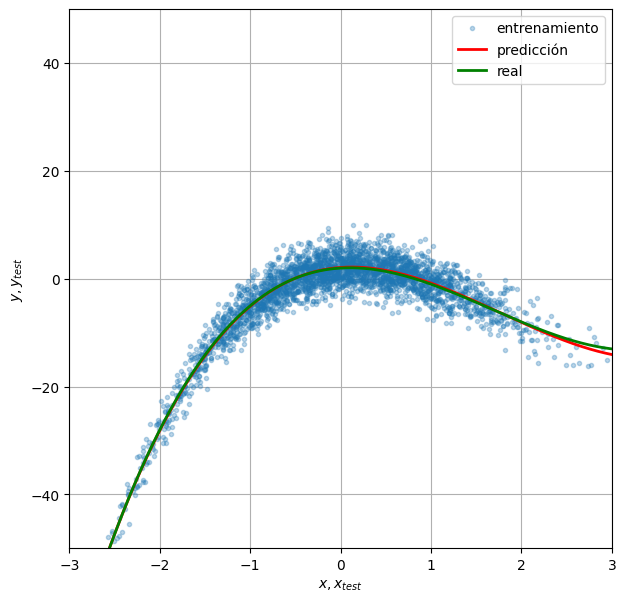

In [3]:
# generamos datos de test nuevos
xtest = np.linspace(-3,3,1000)
ytest = a3*xtest**3 + a2*xtest**2 + a1*xtest + a0

# construimos la matriz X con los mismos términos no lineales que para el entrenamiento
Xtest = np.column_stack((xtest,xtest**2,xtest**3))
ypred = modelo.predict(Xtest)

plt.figure(2,figsize=(7,7));
plt.plot(x,y,'.',alpha=0.3);			# datos de entrenamiento
plt.plot(xtest,ypred,'r',linewidth=2);  # predicción 
plt.plot(xtest,ytest,'g',linewidth=2);  # modelo ideal
plt.xlabel('$x, x_{test}$')
plt.ylabel('$y, y_{test}$')
plt.legend(('entrenamiento','predicción','real'))
plt.grid(True)
plt.axis(xmin=-3,xmax=3,ymin=-50,ymax=50)
plt.show()


# LLEGADOS A ESTE PUNTO... PROBAR A CAMBIAR LOS DATOS Y VER QUÉ PASA

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Ejemplo de Regresión polinómica</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://isa.uniovi.es/~idiaz" property="cc:attributionName" rel="cc:attributionURL">Ignacio Díaz Blanco</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Reconocimiento-CompartirIgual 4.0 Internacional License</a>.